Visualize benchmark results
---
We've benchmarked moslin with [LineageOT](https://doi.org/10.1038/s41467-021-25133-1) on the C. elegans data and visualize the results here. 

# Preliminaries

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Literal, Optional
import sys

## Set up paths

Define the paths for data and figures. 

In [2]:
sys.path.insert(0, "../../")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

FIG_DIR = FIG_DIR / "packer_c_elegans"
DATA_DIR = DATA_DIR / "packer_c_elegans"

## Set global parameters

In [3]:
DPI_SAVE = 400

# should figures just be displayed or also saved?
save_figure = True

## Read the data

In [4]:
df = pd.read_csv(DATA_DIR / "MK_2023-02-27_celegans_precise_and_abpxp.csv", index_col=0)
df.shape

(540, 13)

## Define utility functions

In [5]:
def plot(df: pd.DataFrame, *, lineage_info: Literal["precise", "abpxp"], save: Optional[str] = None):
    df = df.loc[df["config.lineage_info"] == lineage_info].copy()
    df["mean_cost"] = (df["result.early_cost"] + df["result.late_cost"]) / 2.0

    ixs = df.groupby(["config.kind", "config.tp"])["mean_cost"].idxmin()
    df = df.loc[ixs.reset_index()["mean_cost"]]
    df["config.kind"] = df["config.kind"].replace({"lot": "LineageOT"})
    df["config.tp"] = (
        df["config.tp"]
        .astype("str")
        .replace(
            {
                "[170, 210]": "170-210",
                "[210, 270]": "210-270",
                "[270, 330]": "270-330",
                "[330, 390]": "330-390",
                "[390, 450]": "390-450",
                "[450, 510]": "450-510",
            }
        )
    )

    df["config.kind"] = (
        df["config.kind"]
        .astype("category")
        .cat.reorder_categories(["LineageOT", "moslin"])
    )
    print(df[["config.alpha", "config.kind", "config.tp", "config.epsilon", "config.scale_cost"]])

    fig, ax = plt.subplots(dpi=400)
    _ = sns.barplot(df, x="config.tp", y="mean_cost", hue="config.kind", ax=ax, palette=['#73BAB5', '#DBC58A'])
    ax.set_title(lineage_info)
    ax.set_xlabel("time point")
    ax.set_ylabel("mean error")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_axisbelow(True)
    ax.yaxis.grid(True)
    if save is not None: 
        fig.savefig(FIG_DIR / save, bbox_inches='tight')

# Visualize the results

Filter to converged runs. 

In [6]:
df = df.loc[df["result.converged"]]
df.shape

(432, 13)

Show our results and hyperparameters on the subset of cells with precise lineage information.

     config.alpha config.kind config.tp  config.epsilon config.scale_cost
482           NaN   LineageOT   170-210            0.01              mean
494           NaN   LineageOT   210-270            0.05              mean
504           NaN   LineageOT   270-330            0.05              mean
512           NaN   LineageOT   330-390            0.01              mean
524           NaN   LineageOT   390-450            0.05              mean
536           NaN   LineageOT   450-510            0.10              mean
72           0.98      moslin   170-210            0.01              mean
142          0.95      moslin   210-270            0.01              mean
212          0.90      moslin   270-330            0.01              mean
302          0.95      moslin   330-390            0.01              mean
382          0.95      moslin   390-450            0.01              mean
472          0.98      moslin   450-510            0.01              mean


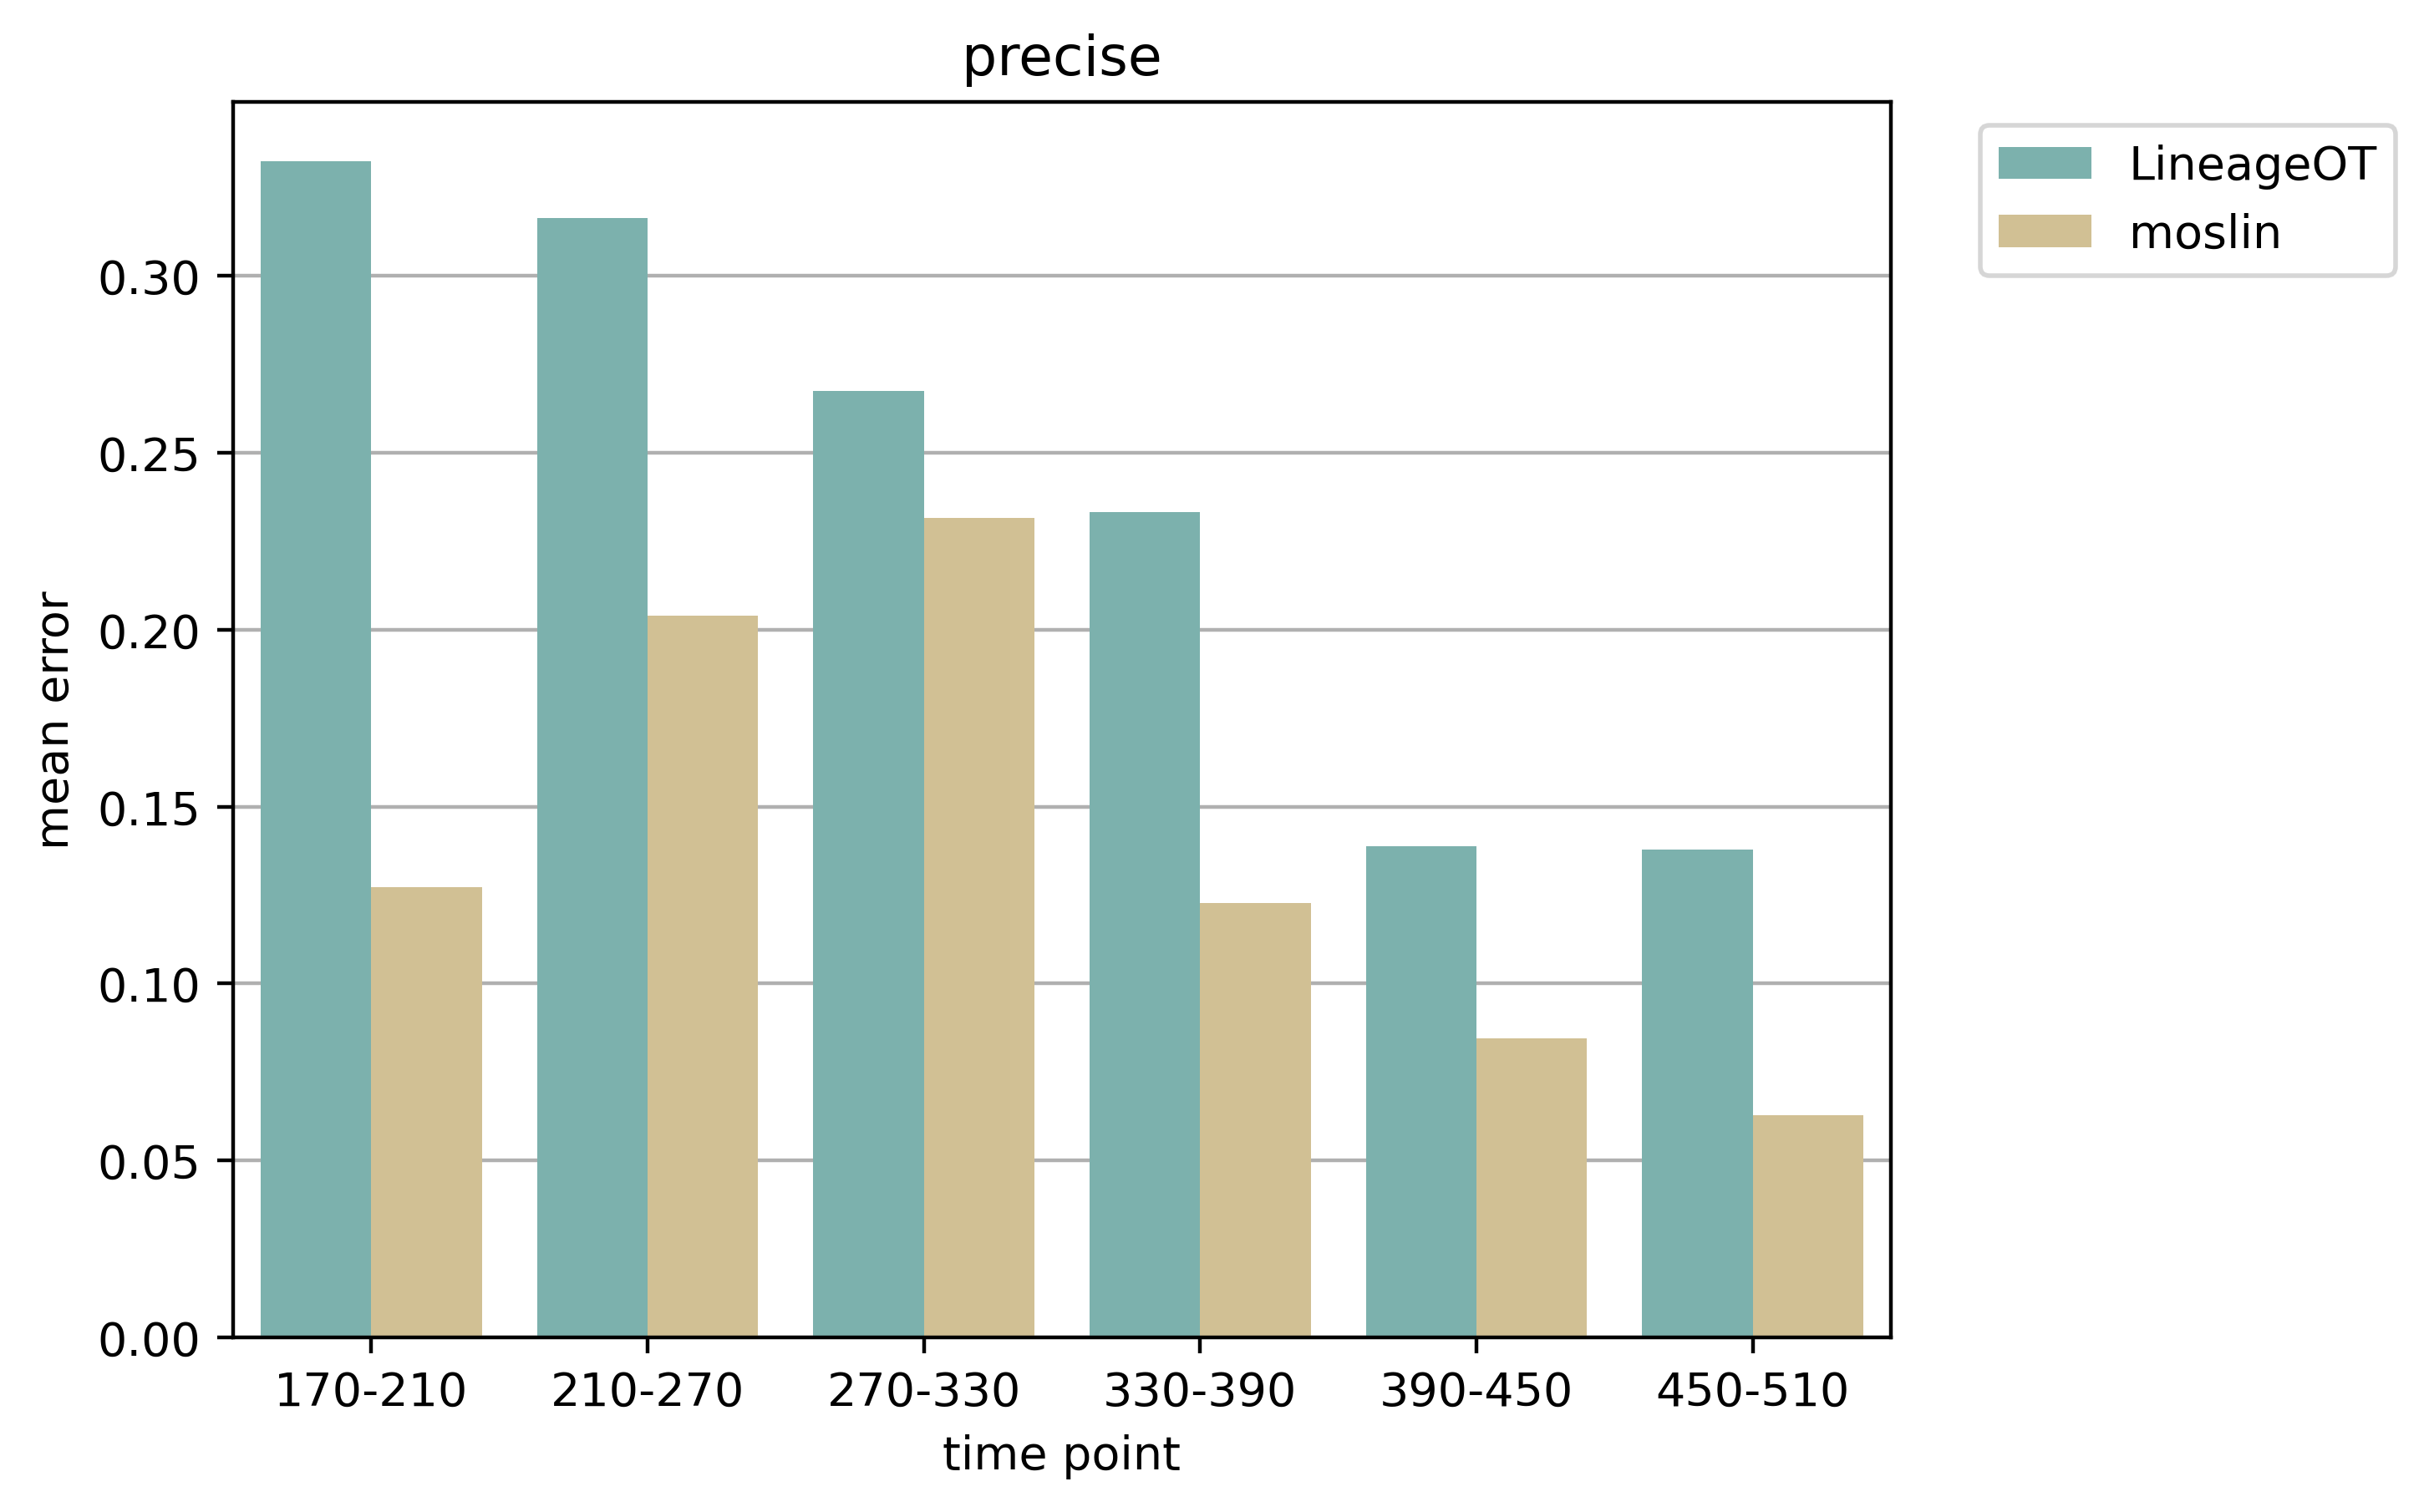

In [7]:
fig_kwargs = {'lineage_info': 'precise'}
if save_figure: fig_kwargs['save'] =  "bar_benchmark_precise.pdf"

plot(df, **fig_kwargs)

Show our results and hyperparameters on the ABpxp lineage.

     config.alpha config.kind config.tp  config.epsilon config.scale_cost
485           NaN   LineageOT   170-210           0.050              mean
495           NaN   LineageOT   210-270           0.050              mean
505           NaN   LineageOT   270-330           0.050              mean
515           NaN   LineageOT   330-390           0.050              mean
525           NaN   LineageOT   390-450           0.050              mean
535           NaN   LineageOT   450-510           0.050              mean
73           0.98      moslin   170-210           0.010              mean
143          0.95      moslin   210-270           0.010              mean
213          0.90      moslin   270-330           0.010              mean
311          0.98      moslin   330-390           0.001              mean
373          0.90      moslin   390-450           0.010              mean
453          0.90      moslin   450-510           0.010              mean


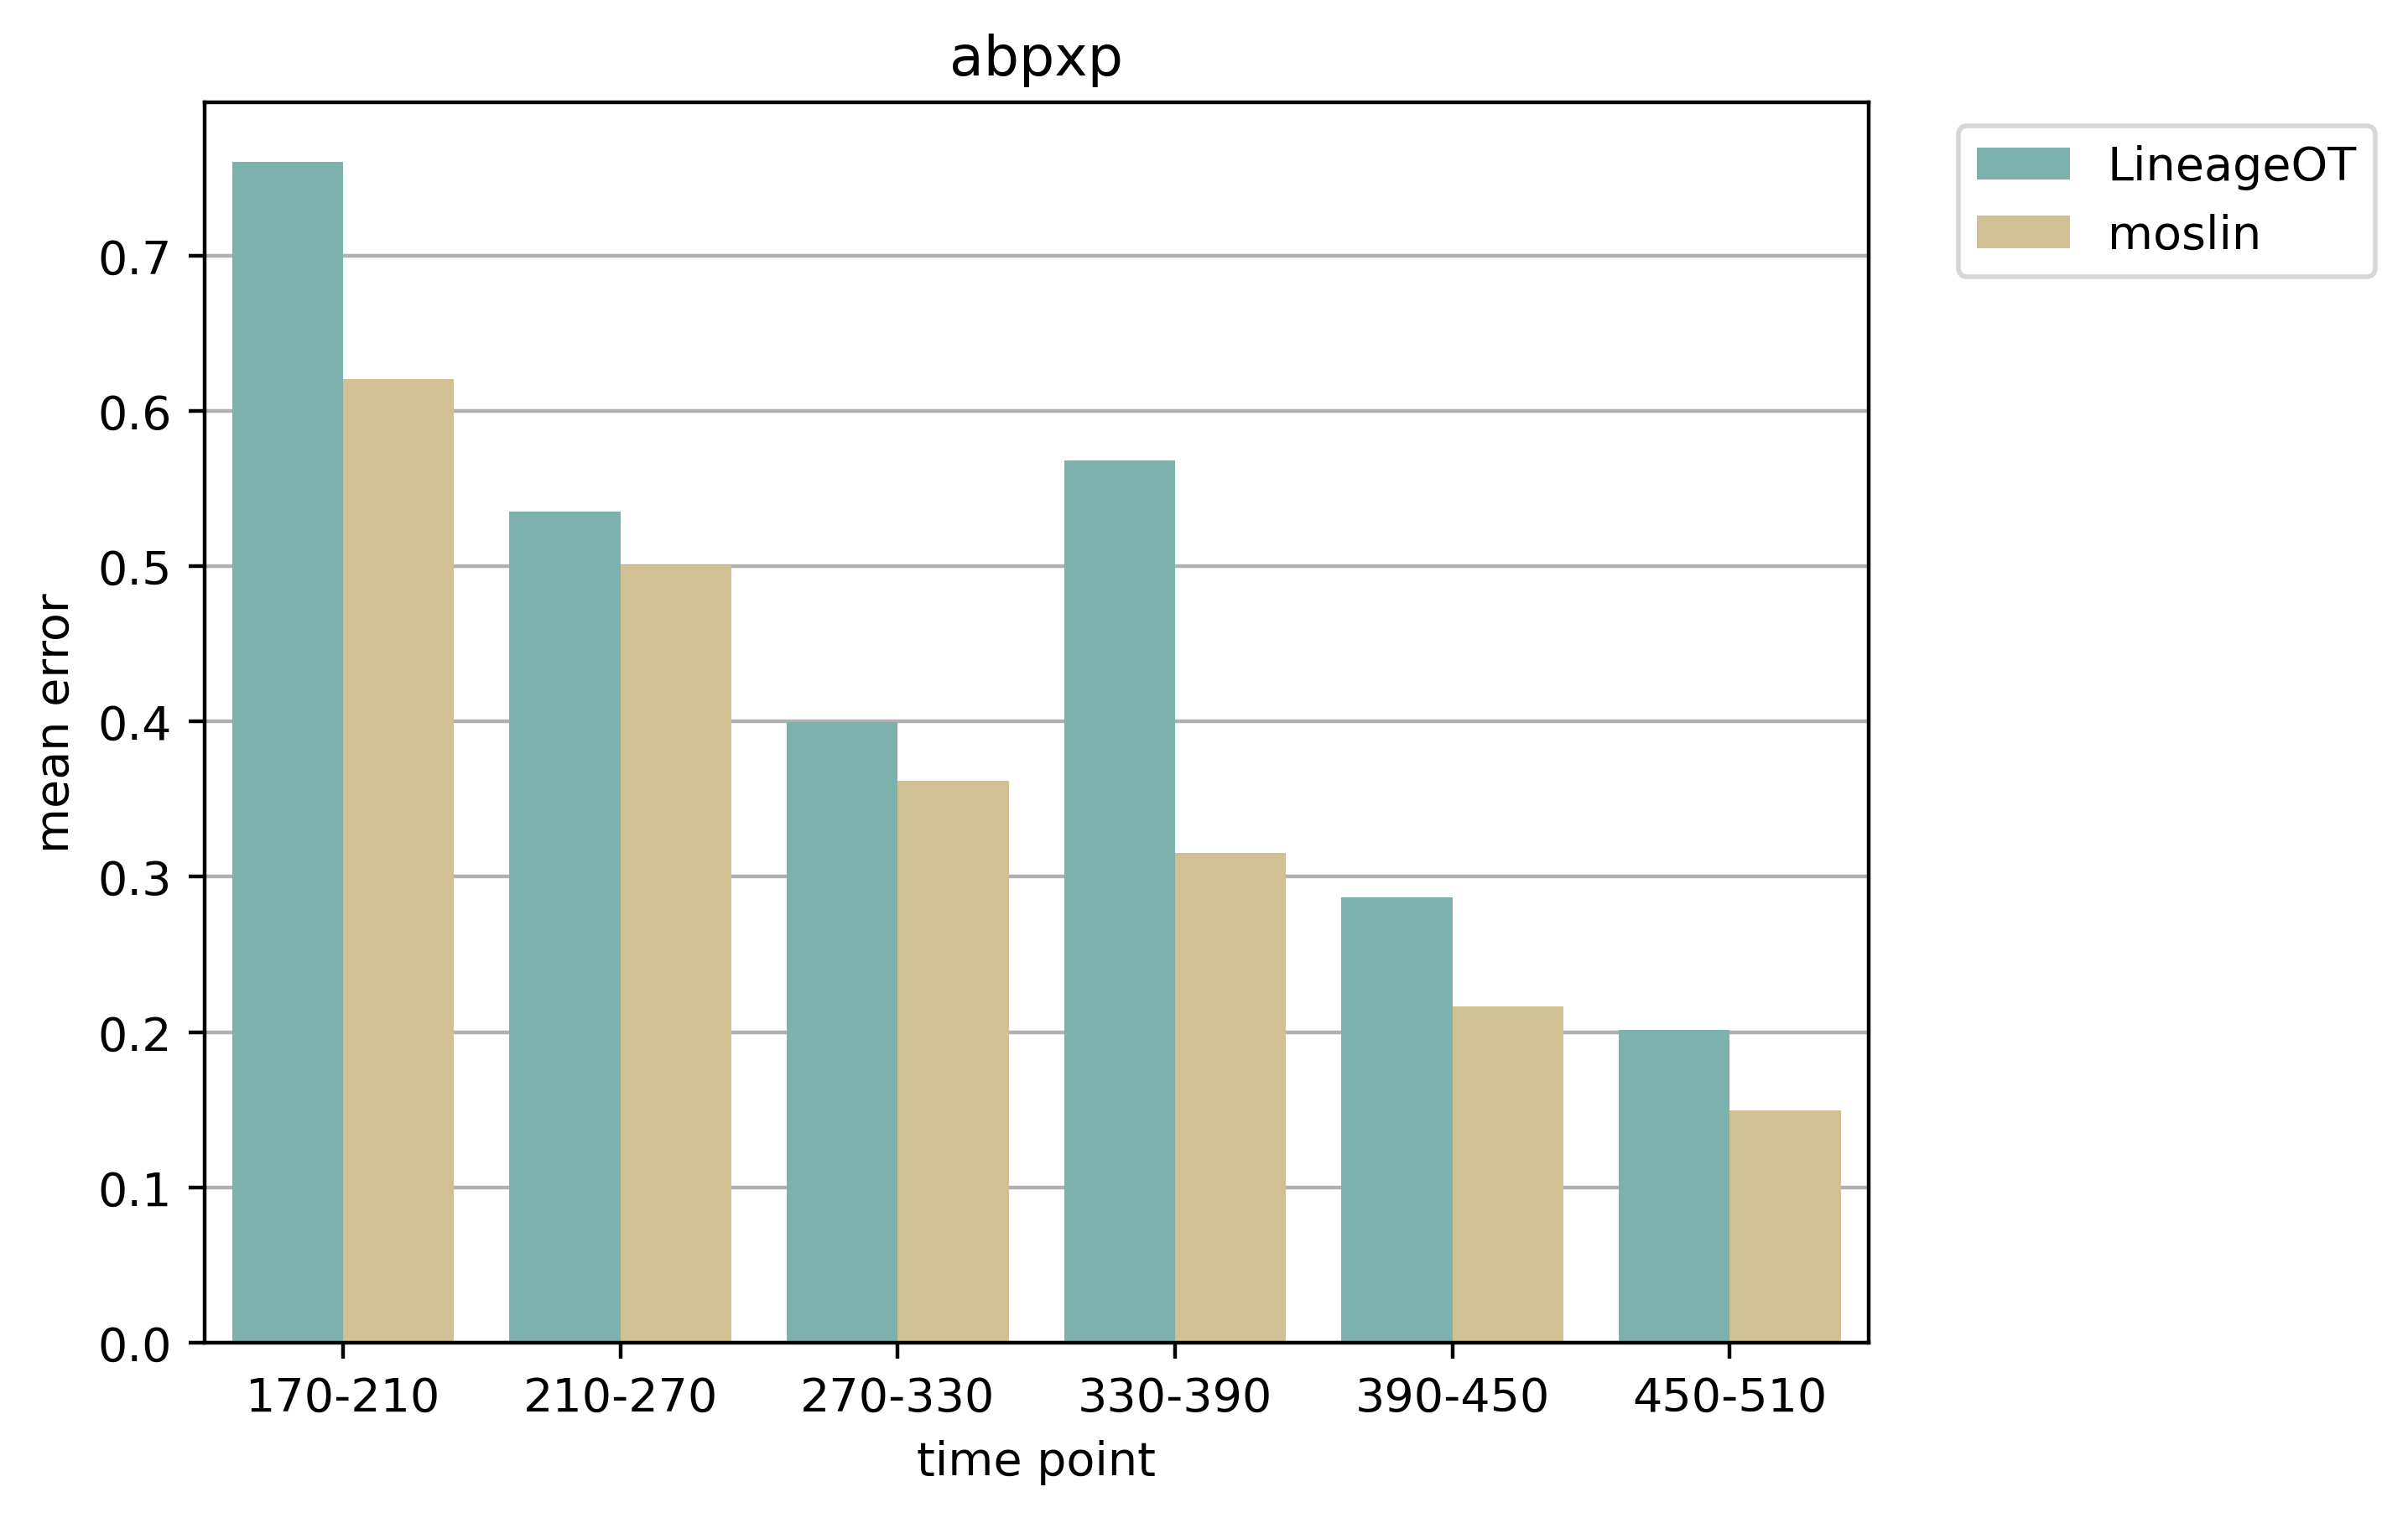

In [8]:
fig_kwargs = {'lineage_info': 'abpxp'}
if save_figure: fig_kwargs['save'] =  "bar_benchmark_abpxp.pdf"

plot(df, **fig_kwargs)